## Analyzing the Stroop Effect

Perform the analysis in the space below. Remember to follow the instructions and review the project rubric before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.

(1) What is the independent variable? What is the dependent variable?

The Stroop effect measures the response time when the color of the a name is different from the name itself. For example, "red" might be written in blue color and the sample is expected to say the color rather than the name.
The independent variable here is whether the name and the color is same or not. The dependent variable is the response time.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The Null Hypothesis, Ho = The response time to name the ink colors for both congruent and incongruent words are same within the population. 
    Ho: mi = mc

The Alternative Hypothesis, Ha = The response time to name the ink colors for incongruent words are greater than the response time for the congruent words within the population.
    Ha: mi > mc

mi : The mean response time of incongruent samples.
mo : The mean response time of congruent samples.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [24]:
# Perform the analysis here

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm


%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [25]:
df=pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [26]:
#Total count of samples
sample_size = df.count()
sample_size[0]

24

In [27]:
cong_mean = np.mean(df['Congruent'])
incong_mean = np.mean(df['Incongruent'])
diff_mean = incong_mean - cong_mean

#Display the number of samples, mean response times of congruent and incongruent cases and the difference between mean response times. 
cong_mean, incong_mean, diff_mean

(14.051125000000004, 22.01591666666667, 7.964791666666665)

Out of 24 samples who were tested against congruent and incongruent test cases, the mean response time in congruent case is 14.1 seconds, incongruent case is 22 seconds and the difference between them are 8 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

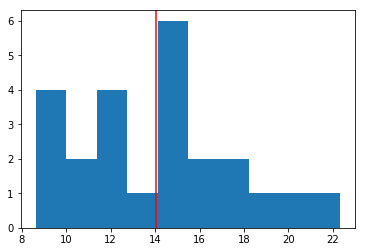

In [28]:
# Build the visualizations here
plt.hist(df['Congruent'])
plt.axvline(x=cong_mean, color = 'red')

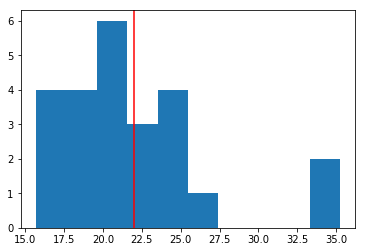

In [29]:
# Build the visualizations here
plt.hist(df['Incongruent'])
plt.axvline(x=incong_mean, color = 'red')

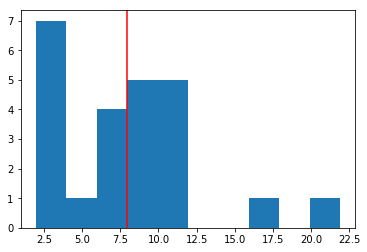

In [30]:
df['Difference'] = df['Incongruent'] - df['Congruent']
plt.hist(df['Difference'])
plt.axvline(x=diff_mean, color = 'red')

We can not observe a much epic normal distribution in both congurent, incongruent and difference histograms. It can be said that the congruent samples are more evenly distributed where as the Incongruent sample histogram is right skewed.

(5) Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Since I do not know mean value of the population and I only have a limited sample size such as 24 (less than 30), I will apply t-test. I will assume the population is in Gaussian distribution. 

The samples respond to both congruent and incongruent test cases which means that we have 2 dependent results for each sample. t-test will be dependent test. We can also say that the samples are measured 2 times according to congruent and incongruent tests. (If each sample returned a congruent or incongruent case only, we could use independent t-test.)

t-test will also be one tailed test because the alternative hypothesis suggests that the response time for incongruent test is greater than the congruent test cases. (If the alternative hypothesis suggested the reponse time for congruent test and incongruent test are different, both mi > mc and mi< mc would be valid and the test would be two-tailed.)

Degree of Freedom (df) = n-1 , where n is the number of pairs in the dependent test. In this case, df = 23.

I will assume the Type 1 error as 0.05 (%5). My confidence level will be %95 in this case. This means that the significance of the difference in the one tailed statistical test should be between 0 and 0.025 in order to accept the result.


In [31]:
# Perform the statistical test here

t_value, p_value = st.ttest_rel(df['Incongruent'],df['Congruent'])

t_value, p_value


(8.020706944109957, 4.1030005857111781e-08)

The resultant t_score is 8.02 for the above t_test which is greater than critical value, 2.069 for Type 1 error= 0.025 for one tailed test and degree of freedom = 23

Since the t_score is much higher than the critical t_value, we can say that there is a big difference between the response times of congruent and incongruent cases.

The significance of the big difference between two sample sets is high since p_value = 0.000000046 is smaller than Type 1 error and very close to 0.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


--write answer here--